# 使用TensorFlow Eager API实现线性回归

In [1]:
# 前面的步骤基本一致
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
# 开启Eager API
tfe.enable_eager_execution()

In [3]:
# 训练数据与学习参数
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

learning_rate = 0.01
display_step = 100
num_steps = 1000

In [4]:
#定义权重与线性模型
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# 定义线性函数模型
def linear_regression(inputs):
    return inputs * W + b

# 定义损失函数
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs)-labels, 2)) / (2 * n_samples)

In [5]:
# 定义梯度下降优化算子
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

# 隐式的计算梯度
grad = tfe.implicit_gradients(mean_square_fn)

Initial cost = 146.675186157W = -2.294113b = 0.604154
Epoch: 0001 cost= 44.165100098 W= -1.1546755 b= 0.76467526
Epoch: 0100 cost= 0.078190900 W= 0.23149405 b= 0.941591
Epoch: 0200 cost= 0.077918716 W= 0.23379758 b= 0.92526007
Epoch: 0300 cost= 0.077705242 W= 0.23583761 b= 0.9107971
Epoch: 0400 cost= 0.077537805 W= 0.23764437 b= 0.897988
Epoch: 0500 cost= 0.077406466 W= 0.23924449 b= 0.88664395
Epoch: 0600 cost= 0.077303469 W= 0.24066156 b= 0.8765975
Epoch: 0700 cost= 0.077222660 W= 0.24191661 b= 0.8676998
Epoch: 0800 cost= 0.077159308 W= 0.24302807 b= 0.85982
Epoch: 0900 cost= 0.077109613 W= 0.24401248 b= 0.8528411
Epoch: 1000 cost= 0.077070624 W= 0.24488425 b= 0.84666055


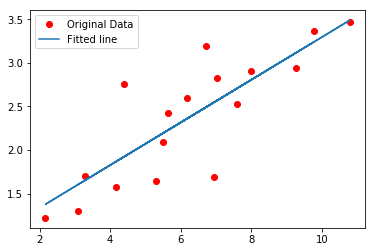

In [6]:
# 在训练之前初始化代价函数
print("Initial cost = {:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)) + "W = %f" % W.numpy() + "b = %f" % b.numpy())

for step in range(num_steps):
    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))
    
    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())
# 画图
plt.plot(train_X, train_Y,'ro', label = "Original Data")
plt.plot(train_X, np.array(W * train_X + b), label = "Fitted line")
plt.legend()
plt.show()